<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-422-srilatha/CIFAR_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 81ms/step - accuracy: 0.3540 - loss: 1.7690 - val_accuracy: 0.5276 - val_loss: 1.2956
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.5737 - loss: 1.2194 - val_accuracy: 0.6110 - val_loss: 1.1158
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.6261 - loss: 1.0689 - val_accuracy: 0.6598 - val_loss: 1.0011
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6661 - loss: 0.9549 - val_accuracy: 0.6624 - val_loss: 0.9759
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.6946 - loss: 0.8812 - val_accuracy: 0.6790 - val_loss: 0.9462
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.7134 - loss: 0.8307 - val_accuracy: 0.6862 - val_loss: 0.9040
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.7287 - loss: 0.7861 - val_accuracy: 0.6712 - val_loss: 0.9480
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.7432 - loss: 0.7351 - 

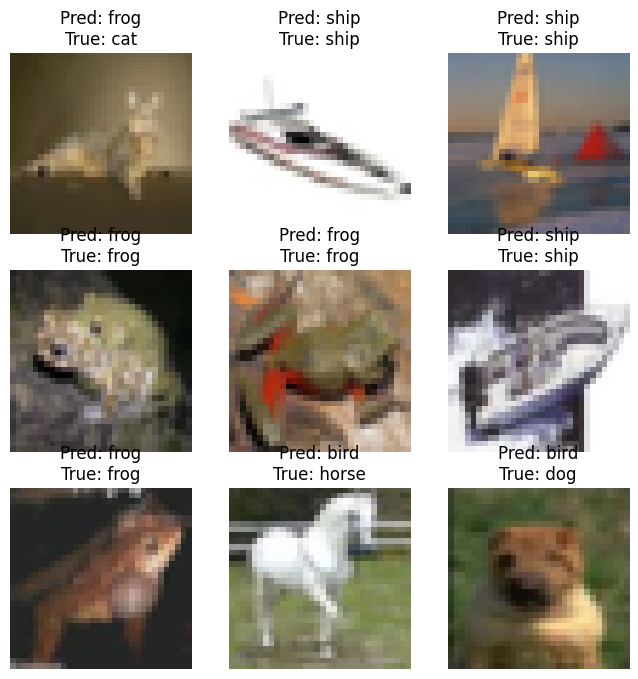

In [ ]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# 2. Load & Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
# 3. Define the Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
# 4. Train the Model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)
# 5. Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
# 6. Visualize Sample Predictions
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,8))
indices = np.random.choice(len(x_test), 9, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx])
    pred = np.argmax(model.predict(x_test[idx:idx+1]))
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()